Customized QAOA Circuit:
                                           ┌───┐┌───────┐┌───┐              »
q_0: ──■─────────────■────■─────────────■──┤ X ├┤ Rz(1) ├┤ X ├──────────────»
     ┌─┴─┐┌───────┐┌─┴─┐  │             │  └─┬─┘└───────┘└─┬─┘              »
q_1: ┤ X ├┤ Rz(1) ├┤ X ├──┼─────────────┼────■─────────────■────■───────────»
     └───┘└───────┘└───┘┌─┴─┐┌───────┐┌─┴─┐                   ┌─┴─┐┌───────┐»
q_2: ───────────────────┤ X ├┤ Rz(2) ├┤ X ├───────────────────┤ X ├┤ Rz(3) ├»
                        └───┘└───────┘└───┘                   └───┘└───────┘»
«          ┌───┐┌───────┐┌───┐                   
«q_0: ─────┤ X ├┤ Rz(2) ├┤ X ├───────────────────
«          └─┬─┘└───────┘└─┬─┘┌───┐┌───────┐┌───┐
«q_1: ──■────┼─────────────┼──┤ X ├┤ Rz(3) ├┤ X ├
«     ┌─┴─┐  │             │  └─┬─┘└───────┘└─┬─┘
«q_2: ┤ X ├──■─────────────■────■─────────────■──
«     └───┘                                      


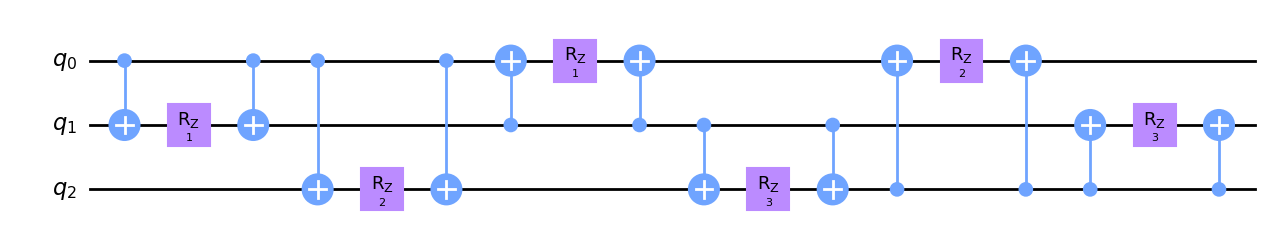

In [1]:
#-------------------------------------------------------------------------
# QAOA for logistics optimization
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work is required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
#-------------------------------------------------------------------------

# Customized Cost Hamiltonian for Vehicle Routing Problem - VRP
def custom_vrp_cost(qc, distances, penalties, gamma):
    for i in range(len(distances)):
        for j in range(len(distances)):
            if distances[i][j] != 0:
                qc.cx(i, j)
                qc.rz(2 * gamma * distances[i][j], j)
                qc.cx(i, j)

# Example circuit
qc = QuantumCircuit(3)
distances = [[0, 1, 2], [1, 0, 3], [2, 3, 0]]
penalties = [1, 1, 1]
custom_vrp_cost(qc, distances, penalties, gamma=0.5)
print("Customized QAOA Circuit:")
print(qc)

# Draw the circuit
display(circuit_drawer(qc, output='mpl', style="iqp"))